In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy import stats
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,Imputer
from sklearn.model_selection import cross_val_score, train_test_split, KFold 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, BayesianRidge
from sklearn.metrics import mean_squared_error, make_scorer
# from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline


In [7]:
#Reading in our dataset
train_df = pd.read_csv('train.csv') # reading in the training dataset.
test_df = pd.read_csv('test.csv')# reading in the test dataset.
combined = pd.concat([train_df,test_df], axis=0) #combining train and test dataset for data preprocessing
combined.shape

(2930, 82)

In [8]:
train_df.shape # training dataset has 1460 observationsb

(2051, 82)

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

In [10]:
test_df.shape # test dataset has 1459 observations

(879, 80)

In [11]:
combined.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,...,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,...,130500.0,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,...,220000.0,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,...,109000.0,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,...,174000.0,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,...,138500.0,0,Pave,6,676.0,AllPub,0,1900,1993,2010


In [12]:
#How many columns with different data types are there?
combined.get_dtype_counts()

float64    12
int64      27
object     43
dtype: int64

In [13]:
combined['SalePrice'].describe() # checking how Sales Price Variable is distributed



count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

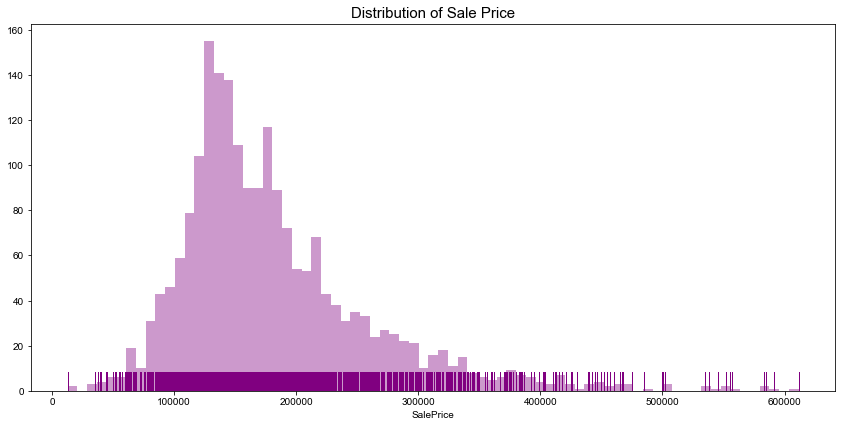

In [14]:
#plot the distribution plot of SalePrices of the houses
plt.figure(figsize=(12,6))
sns.distplot(combined['SalePrice'].dropna() ,kde= False,bins=75 , rug = True ,color='purple')
sns.set(font_scale = 1.25)
plt.tight_layout()
plt.title('Distribution of Sale Price')

In [15]:
sp_corr = combined.corr()["SalePrice"]
sp_corr_sort = sp_corr.sort_values(axis = 0 , ascending = False)
sp_corr_sort[sp_corr_sort > 0.50]

SalePrice         1.000000
Overall Qual      0.800207
Gr Liv Area       0.697038
Garage Area       0.650270
Garage Cars       0.648220
Total Bsmt SF     0.628925
1st Flr SF        0.618486
Year Built        0.571849
Year Remod/Add    0.550370
Full Bath         0.537969
Garage Yr Blt     0.533922
Mas Vnr Area      0.512230
TotRms AbvGrd     0.504014
Name: SalePrice, dtype: float64

In [16]:
combined.columns = [x.replace(' ','') for x in combined.columns]

In [17]:
combined.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath',
       'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish',
       'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PID',
       'PavedDrive', 'PoolAre

In [18]:
corr = combined[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemod/Add"]].corr()

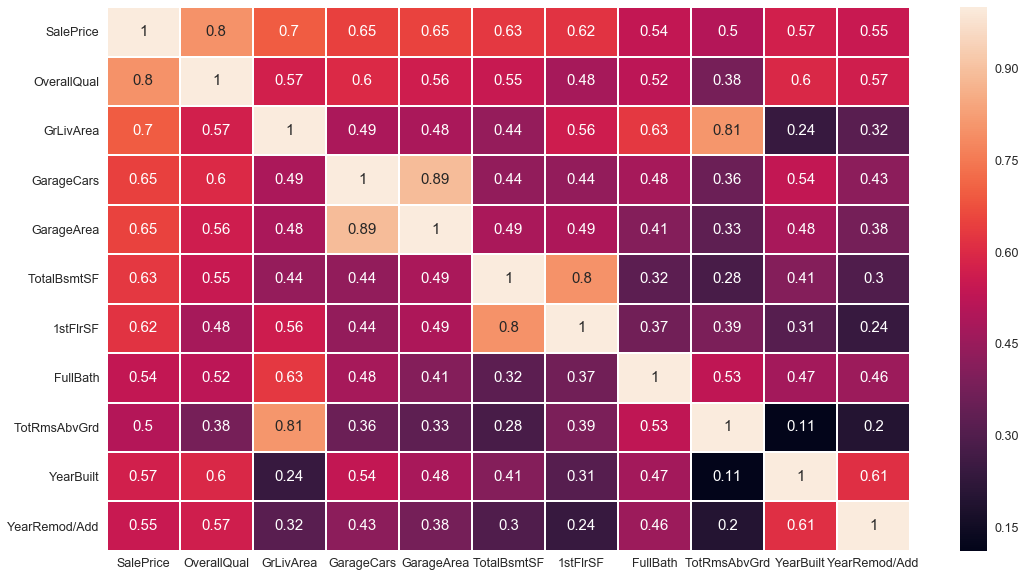

In [19]:
plt.figure(figsize=(18,10))
sns.heatmap(corr, linecolor= "white" , lw =1,annot=True)

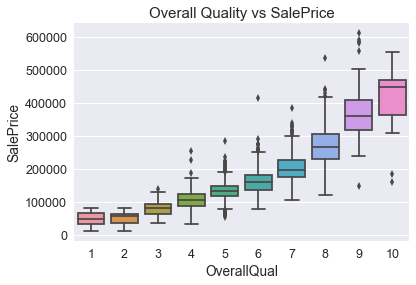

In [20]:
sns.boxplot(y="SalePrice", x="OverallQual", data=combined)
plt.title('Overall Quality vs SalePrice')

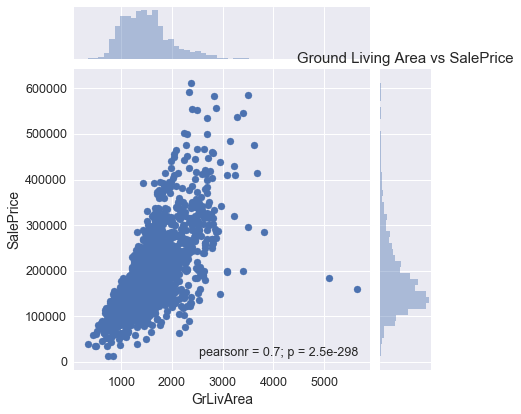

In [21]:
sns.jointplot(y="SalePrice", x="GrLivArea", data=combined)
plt.title('Ground Living Area vs SalePrice')

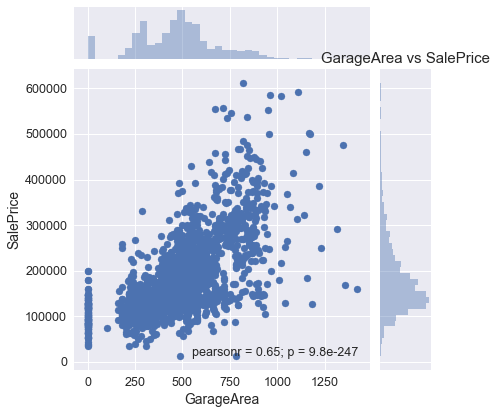

In [22]:
sns.jointplot(y="SalePrice", x="GarageArea", data=combined)
plt.title('GarageArea vs SalePrice')

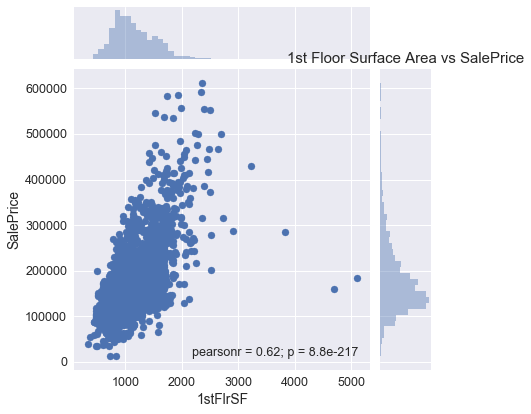

In [23]:
sns.jointplot(y="SalePrice", x="1stFlrSF", data=combined)
plt.title('1st Floor Surface Area vs SalePrice')

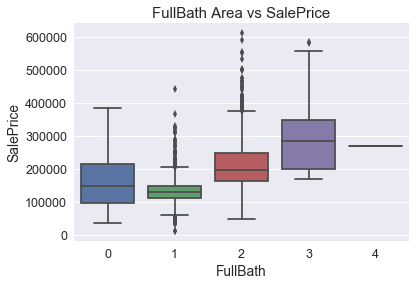

In [24]:
sns.boxplot(y="SalePrice", x="FullBath", data=combined)
plt.title('FullBath Area vs SalePrice')

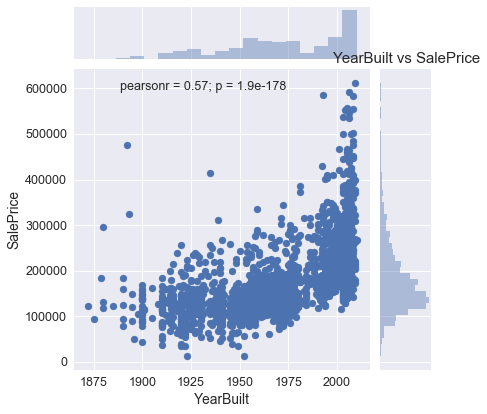

In [25]:
sns.jointplot(y="SalePrice", x="YearBuilt", data=combined)
plt.title('YearBuilt vs SalePrice')

In [26]:
#Missing Value imputation
#Categorical variables
combined.select_dtypes(include=['object']).columns


Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtQual',
       'BsmtFinType1', 'BsmtFinType2', 'CentralAir', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating',
       'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [27]:
#Numerical Columns
combined.select_dtypes(include=['float64', 'int64']).columns



Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFullBath',
       'BsmtHalfBath', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PID',
       'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'WoodDeckSF', 'YearBuilt', 'YearRemod/Add', 'YrSold'],
      dtype='object')

In [28]:
mean_imputer = Imputer(missing_values='NaN', strategy = 'mean', axis=0)
median_imputer = Imputer(missing_values='NaN', strategy = 'median', axis=0)
mode_imputer = Imputer(missing_values='NaN', strategy = 'most_frequent', axis=0)

In [29]:
#Missing values in the columns
combined[combined.columns[combined.isnull().any()]].isnull().sum()

Alley            2732
BsmtCond           80
BsmtExposure       83
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           80
BsmtUnfSF           1
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       80
BsmtFinType2       81
Electrical          1
Fence            2358
FireplaceQu      1422
GarageArea          1
GarageCars          1
GarageCond        159
GarageFinish      159
GarageQual        159
GarageType        157
GarageYrBlt       159
LotFrontage       490
MasVnrArea         23
MasVnrType         23
MiscFeature      2824
PoolQC           2917
SaleCondition     879
SalePrice         879
TotalBsmtSF         1
dtype: int64

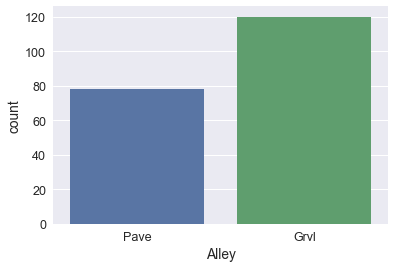

In [30]:
sns.countplot(x = 'Alley' , data = combined )

In [31]:
combined['Alley'].fillna('None',inplace = True)

In [32]:
combined[combined['BsmtCond'].isnull() == True][['BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'BsmtQual','BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF','TotalBsmtSF']]

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF
12,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
240,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
249,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
256,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
390,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
437,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#Categorical features 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'BsmtQual'

combined['BsmtQual'].fillna(value = 'None' , inplace = True)
combined['BsmtCond'].fillna(value = 'None' , inplace = True)
combined['BsmtExposure'].fillna(value = 'None' , inplace = True)
combined['BsmtFinType1'].fillna(value = 'None' , inplace = True)
combined['BsmtFinType2'].fillna(value = 'None' , inplace = True)

In [34]:
#Numerical Features 'BsmtCond','BsmtFinSF1','BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF','TotalBsmtSF'

combined['BsmtFinSF1'].fillna(value = 0 , inplace = True)
combined['BsmtFinSF2'].fillna(value = 0 , inplace = True)
combined['BsmtFullBath'].fillna(value = 0 , inplace = True)
combined['BsmtHalfBath'].fillna(value = 0 , inplace = True)
combined['BsmtUnfSF'].fillna(value = 0 , inplace = True)
combined['TotalBsmtSF'].fillna(value = 0 , inplace = True)

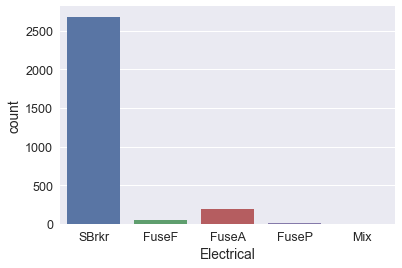

In [35]:
sns.countplot(x = 'Electrical' , data = combined)



In [36]:
combined['Electrical'].fillna(value = 'SBrkr' , inplace = True)

In [37]:
combined[combined['FireplaceQu'].isnull() == True][['Fireplaces','FireplaceQu']]



,Fireplaces,FireplaceQu
0,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
6,0,NaN
7,0,NaN
8,0,NaN
10,0,NaN
11,0,NaN
13,0,NaN


In [38]:
combined['FireplaceQu'].fillna(value = 'None' , inplace =  True)

In [39]:
combined[combined['GarageType'].isnull() == True][['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','GarageArea','GarageCars']]



,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,GarageArea,GarageCars
28,NaN,NaN,NaN,NaN,NaN,0.0,0.0
53,NaN,NaN,NaN,NaN,NaN,0.0,0.0
65,NaN,NaN,NaN,NaN,NaN,0.0,0.0
79,NaN,NaN,NaN,NaN,NaN,0.0,0.0
101,NaN,NaN,NaN,NaN,NaN,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0
114,NaN,NaN,NaN,NaN,NaN,0.0,0.0
120,NaN,NaN,NaN,NaN,NaN,0.0,0.0
134,NaN,NaN,NaN,NaN,NaN,0.0,0.0
136,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [40]:
combined['GarageType'].fillna(value = 'None' , inplace = True)
combined['GarageYrBlt'].fillna(value = 'None' , inplace = True)
combined['GarageFinish'].fillna(value = 'None' , inplace = True)
combined['GarageQual'].fillna(value = 'None' , inplace = True)
combined['GarageCond'].fillna(value = 'None' , inplace = True)
combined['GarageArea'].fillna(value = 0 , inplace = True)
combined['GarageCars'].fillna(value = 0 , inplace = True)

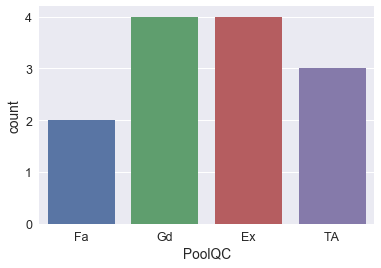

In [41]:
sns.countplot(x = 'PoolQC' , data = combined)

In [42]:
combined[combined['PoolQC'].isnull() == True][['PoolQC','PoolArea']]

,PoolQC,PoolArea
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
5,NaN,0
6,NaN,0
7,NaN,0
8,NaN,0
9,NaN,0


In [43]:
combined['PoolQC'].fillna(value = 'None' , inplace = True)

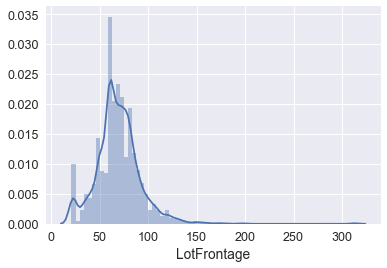

In [44]:
sns.distplot(combined['LotFrontage'].dropna() , bins =70)

In [45]:
combined['LotFrontage'] = combined['LotFrontage'].transform(lambda x: x.fillna(x.mode()[0]))

In [46]:
combined['MiscFeature'] = combined['MiscFeature'].fillna('None')
combined['Exterior1st'].fillna(value= 'None', inplace = True)
combined['Exterior2nd'].fillna(value= 'None', inplace = True)
combined['Functional'].fillna(value= 'None', inplace = True)
combined['KitchenQual'].fillna(value = 'None' , inplace = True)
combined['MSZoning'].fillna(value = 'None' , inplace = True)
combined['SaleType'].fillna(value = 'None' , inplace = True)
combined['Utilities'].fillna(value = 'None' , inplace = True)
combined["MasVnrType"] = combined["MasVnrType"].fillna('None')
combined["MasVnrArea"] = combined["MasVnrArea"].fillna(0)
combined["Fence"] = combined["Fence"].fillna('None')
combined['SaleCondition'] = combined['SaleCondition'].map(lambda x: 1 if x=='Abnorml' else 0)

In [47]:
combined[combined.columns[combined.isnull().any()]].isnull().sum()

SalePrice    879
dtype: int64

In [50]:
combined['SaleCondition'].unique()

array([0, 1])

In [51]:
combined.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,...,SalePrice,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemod/Add,YrSold
0,725,754,0,None,3,1Fam,TA,No,0.0,0.0,...,11.779136,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,None,4,1Fam,TA,No,1.0,0.0,...,12.301387,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,None,3,1Fam,TA,No,1.0,0.0,...,11.599112,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,None,3,1Fam,TA,No,0.0,0.0,...,12.066816,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,None,3,1Fam,Gd,No,0.0,0.0,...,11.838633,0,Pave,6,676.0,AllPub,0,1900,1993,2010


In [52]:
#Converting Categorical variables to numeric
categorical = combined.select_dtypes(exclude=['float64', 'int64'])

In [53]:
labelEnc=LabelEncoder()

cat_vars=['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities']

In [54]:
for col in cat_vars:
    combined[col]=labelEnc.fit_transform(combined[col])

In [55]:
combined.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,...,SalePrice,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemod/Add,YrSold
0,725,754,0,1,3,0,5,3,0.0,0.0,...,11.779136,0,1,6,725.0,0,0,1976,2005,2010
1,913,1209,0,1,4,0,5,3,1.0,0.0,...,12.301387,0,1,8,913.0,0,0,1996,1997,2009
2,1057,0,0,1,3,0,5,3,1.0,0.0,...,11.599112,0,1,5,1057.0,0,0,1953,2007,2010
3,744,700,0,1,3,0,5,3,0.0,0.0,...,12.066816,0,1,7,384.0,0,100,2006,2007,2010
4,831,614,0,1,3,0,2,3,0.0,0.0,...,11.838633,0,1,6,676.0,0,0,1900,1993,2010


In [56]:
# Year Columns
#'GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold'
combined['GarageYrBlt'].replace('None' , 100, inplace = True)

In [57]:
combined.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath',
       'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish',
       'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PID',
       'PavedDrive', 'PoolAre

In [58]:
labelEnc=LabelEncoder()

cat_vars=['GarageYrBlt','YearBuilt','YearRemod/Add', 'YrSold']

for col in cat_vars:
    combined[col]=labelEnc.fit_transform(combined[col])

In [59]:
combined.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,...,SalePrice,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemod/Add,YrSold
0,725,754,0,1,3,0,5,3,0.0,0.0,...,11.779136,0,1,6,725.0,0,0,83,55,4
1,913,1209,0,1,4,0,5,3,1.0,0.0,...,12.301387,0,1,8,913.0,0,0,103,47,3
2,1057,0,0,1,3,0,5,3,1.0,0.0,...,11.599112,0,1,5,1057.0,0,0,60,57,4
3,744,700,0,1,3,0,5,3,0.0,0.0,...,12.066816,0,1,7,384.0,0,100,113,57,4
4,831,614,0,1,3,0,2,3,0.0,0.0,...,11.838633,0,1,6,676.0,0,0,12,43,4


#Modelling

In [60]:
New_Train = combined[:2051]
X_train = New_Train.drop('SalePrice',axis=1)
y_train = New_Train['SalePrice']



In [61]:
X_train.shape

(2051, 81)

In [62]:
New_Test = combined[2051:]
X_test = New_Test.drop('SalePrice',axis=1)

In [63]:
X_test.shape

(879, 81)

In [64]:
X_train

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemod/Add,YrSold
0,725,754,0,1,3,0,5,3,0.0,0.0,...,9,0,1,6,725.0,0,0,83,55,4
1,913,1209,0,1,4,0,5,3,1.0,0.0,...,9,0,1,8,913.0,0,0,103,47,3
2,1057,0,0,1,3,0,5,3,1.0,0.0,...,9,0,1,5,1057.0,0,0,60,57,4
3,744,700,0,1,3,0,5,3,0.0,0.0,...,9,0,1,7,384.0,0,100,113,57,4
4,831,614,0,1,3,0,2,3,0.0,0.0,...,9,0,1,6,676.0,0,0,12,43,4
5,1888,0,0,1,2,0,5,3,0.0,0.0,...,9,0,1,6,1517.0,0,0,73,52,4
6,1072,0,0,1,2,4,5,1,1.0,0.0,...,6,0,1,5,547.0,0,0,112,56,0
7,1188,0,0,1,3,0,5,3,1.0,0.0,...,0,0,1,6,1188.0,0,0,66,9,4
8,924,0,0,1,2,0,5,3,0.0,0.0,...,9,0,1,6,924.0,0,0,59,2,1
9,1040,1040,0,1,5,0,5,0,0.0,1.0,...,9,0,1,9,1040.0,0,335,76,19,1


#Ridge Regression

In [65]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [ ]:
# #Defining a function to calculate the RMSE for each Cross validated fold
# def rmse_cv(model):
#     rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
#     return (rmse)



In [ ]:
# model_ridge = Ridge(alpha = 5).fit(X_train, y_train)

In [ ]:
# alphas = [0.0001,0.1,0.5,1,2,5,7,10]
# rmse_cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
# print(rmse_cv_ridge)

In [ ]:
# rmse_cv_ridge = pd.Series(rmse_cv_ridge, index = alphas)
# rmse_cv_ridge.plot(title = "RMSE VS Alpha")

In [ ]:
# from sklearn.linear_model import Lasso

In [ ]:
# model_lasso = Lasso().fit(X_train, y_train)

In [ ]:
# alphas = [0.00001,.0001,0.001,0.002,0.005,0.01]
# rmse_cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]
# print(rmse_cv_lasso)

In [ ]:
# rmse_cv_lasso = pd.Series(rmse_cv_lasso, index = alphas)
# plt.figure(figsize=(10,4))
# rmse_cv_lasso.plot(title = "RMSE VS Alpha")

In [ ]:
# model_lasso = Lasso(alpha = 0.001 , max_iter=1000).fit(X_train, y_train)

In [ ]:
# rmse_cv(model_lasso).mean()

In [ ]:
# predictors = X_train.columns

# coef = pd.Series(model_lasso.coef_, index = X_train.columns)

# imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])

# plt.figure(figsize=(12,8))
# imp_coef.plot(kind = "barh")
# plt.title("Coefficients in the Lasso Model")

In [ ]:
# lasso_preds = np.expm1(model_lasso.predict(X_test)) # reversing Log Transformation

In [66]:
from sklearn.tree import DecisionTreeRegressorprint(reg_scores, np.mean(reg_scores))

In [67]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score

In [68]:
# cross val Linear Reg with 4 folds
reg_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=4)

In [71]:
print(reg_scores, np.mean(reg_scores))
linreg = LinearRegression().fit(X_train, y_train)

[ 0.84217733  0.80009444  0.89835702  0.85485619] 0.848871244304


In [ ]:
# set 4 models
dtr1 = DecisionTreeRegressor(max_depth=1)
dtr2 = DecisionTreeRegressor(max_depth=2)
dtr3 = DecisionTreeRegressor(max_depth=3)
dtrN = DecisionTreeRegressor(max_depth=None)

In [72]:
# fit the 4 models
dtr1.fit(X_train, y_train)
dtr2.fit(X_train, y_train)
dtr3.fit(X_train, y_train)
dtrN.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [73]:
# cross validate the 4 models
dtr1_scores = cross_val_score(dtr1, X_train, y_train, cv=4)
dtr2_scores = cross_val_score(dtr2, X_train, y_train, cv=4)
dtr3_scores = cross_val_score(dtr3, X_train, y_train, cv=4)
dtrN_scores = cross_val_score(dtrN, X_train, y_train, cv=4)

# score the 4 models
print(dtr1_scores, np.mean(dtr1_scores))
print(dtr2_scores, np.mean(dtr2_scores))
print(dtr3_scores, np.mean(dtr3_scores))
print(dtrN_scores, np.mean(dtrN_scores))

[ 0.40424153  0.48944486  0.43805645  0.4238459 ] 0.438897184023
[ 0.58680443  0.62373173  0.59301714  0.60008701] 0.60091007759
[ 0.67326574  0.69207411  0.68823773  0.70604364] 0.689905305522
[ 0.70652491  0.71061159  0.71688121  0.69742156] 0.707859816085


In [80]:
dt_preds = DecisionTreeRegressor.predict(dtrN,X_test,check_input=True)

In [85]:
submission1 = pd.DataFrame({
        "Id": X_test["Id"],
        "SalePrice": dt_preds
    })

In [87]:
submission1.to_csv("HousePrice1.csv", index=False)

#####Classification Model######

In [ ]:
X_train['SaleCondition'].value_counts()